# Wrangle and Analyse Data

Eze Ahunanya

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Gathering](#gather)
- [Part II - Data Assesment](#assess)
- [Part III - Data Cleaning](#clean)
- [Part IV - Data Analysis](#analyse)
- [Conclusion](#conclude)


<a id='intro'></a>
### Introduction

In this project, the tweet archiveof the user @dog_rates, also known as WeRateDogs, will be gathered, assessed, cleaned and analysed. The the twitter api will be queried to completed the data on hand.

<a id='gather'></a>
### Part I - Data Gathering


In [2]:
import requests
import os 
import pandas as pd
import json
import timeit

In [2]:
#dowloading the tsv file into the response variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'Data Wrangling.ipynb',
 'image-predictions.tsv',
 'twitter-archive-enhanced.csv']

In [23]:
import tweepy

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
# reading archive into pandas
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
# list of tweet ids
tweet_ids = archive.tweet_id

In [25]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timeit.timeit()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timeit.timeit()
print(end - start)
print(fails_dict);

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 484


Success
865: 762464539388485633
Success
866: 762316489655476224
Success
867: 762035686371364864
Success
868: 761976711479193600
Success
869: 761750502866649088
Success
870: 761745352076779520
Success
871: 761672994376806400
Success
872: 761599872357261312
Success
873: 761371037149827077
Success
874: 761334018830917632
Success
875: 761292947749015552
Success
876: 761227390836215808
Success
877: 761004547850530816
Success
878: 760893934457552897
Success
879: 760656994973933572
Success
880: 760641137271070720
Success
881: 760539183865880579
Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Success
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Success
892: 759557299618865152
Success
893: 759447681597108224
Success
894: 759446261539934208
Success
895: 759197388317847553
Success


Success
1118: 732375214819057664
Success
1119: 732005617171337216
Success
1120: 731285275100512256
Success
1121: 731156023742988288
Success
1122: 730924654643314689
Success
1123: 730573383004487680
Success
1124: 730427201120833536
Success
1125: 730211855403241472
Success
1126: 730196704625098752
Success
1127: 729854734790754305
Success
1128: 729838605770891264
Success
1129: 729823566028484608
Success
1130: 729463711119904772
Success
1131: 729113531270991872
Success
1132: 728986383096946689
Success
1133: 728760639972315136
Success
1134: 728751179681943552
Success
1135: 728653952833728512
Success
1136: 728409960103686147
Success
1137: 728387165835677696
Success
1138: 728046963732717569
Success
1139: 728035342121635841
Success
1140: 728015554473250816
Success
1141: 727685679342333952
Success
1142: 727644517743104000
Success
1143: 727524757080539137
Success
1144: 727314416056803329
Success
1145: 727286334147182592
Success
1146: 727175381690781696
Success
1147: 727155742655025152
Success
11

Success
1367: 702671118226825216
Success
1368: 702598099714314240
Success
1369: 702539513671897089
Success
1370: 702332542343577600
Success
1371: 702321140488925184
Success
1372: 702276748847800320
Success
1373: 702217446468493312
Success
1374: 701981390485725185
Success
1375: 701952816642965504
Success
1376: 701889187134500865
Success
1377: 701805642395348998
Success
1378: 701601587219795968
Success
1379: 701570477911896070
Success
1380: 701545186879471618
Success
1381: 701214700881756160
Success
1382: 700890391244103680
Success
1383: 700864154249383937
Success
1384: 700847567345688576
Success
1385: 700796979434098688
Success
1386: 700747788515020802
Success
1387: 700518061187723268
Success
1388: 700505138482569216
Success
1389: 700462010979500032
Success
1390: 700167517596164096
Success
1391: 700151421916807169
Success
1392: 700143752053182464
Success
1393: 700062718104104960
Success
1394: 700029284593901568
Success
1395: 700002074055016451
Success
1396: 699801817392291840
Success
13

Success
1616: 685268753634967552
Success
1617: 685198997565345792
Success
1618: 685169283572338688
Success
1619: 684969860808454144
Success
1620: 684959798585110529
Success
1621: 684940049151070208
Success
1622: 684926975086034944
Success
1623: 684914660081053696
Success
1624: 684902183876321280
Success
1625: 684880619965411328
Success
1626: 684830982659280897
Success
1627: 684800227459624960
Success
1628: 684594889858887680
Success
1629: 684588130326986752
Success
1630: 684567543613382656
Success
1631: 684538444857667585
Success
1632: 684481074559381504
Success
1633: 684460069371654144
Success
1634: 684241637099323392
Success
1635: 684225744407494656
Success
1636: 684222868335505415
Success
1637: 684200372118904832
Success
1638: 684195085588783105
Success
1639: 684188786104872960
Success
1640: 684177701129875456
Success
1641: 684147889187209216
Success
1642: 684122891630342144
Success
1643: 684097758874210310
Success
1644: 683857920510050305
Success
1645: 683852578183077888
Success
16

Rate limit reached. Sleeping for: 591


Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
1775: 678023323247357953
Success
1776: 678021115718029313
Success
1777: 677961670166224897
Success
1778: 677918531514703872
Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
17

Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
2024: 671896809300709376
Success
2025: 671891728106971137
Success
2026: 671882082306625538
Success
2027: 671879137494245376
Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
20

Success
2263: 667546741521195010
Success
2264: 667544320556335104
Success
2265: 667538891197542400
Success
2266: 667534815156183040
Success
2267: 667530908589760512
Success
2268: 667524857454854144
Success
2269: 667517642048163840
Success
2270: 667509364010450944
Success
2271: 667502640335572993
Success
2272: 667495797102141441
Success
2273: 667491009379606528
Success
2274: 667470559035432960
Success
2275: 667455448082227200
Success
2276: 667453023279554560
Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
22

In [5]:
# creating list of json objects (python dictionaries)
df_list = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append(data)  

In [6]:
df_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [7]:
# final dataframe
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7894,36993
1,892177421306343426,5865,31841
2,891815181378084864,3869,23982
3,891689557279858688,8062,40326
4,891327558926688256,8727,38535
5,891087950875897856,2902,19372
6,890971913173991426,1919,11296
7,890729181411237888,17625,62413
8,890609185150312448,4002,26658
9,890240255349198849,6863,30519


In [8]:
# reading image predictions into pandas
image = pd.read_csv('image-predictions.tsv', sep='\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


<a id='assess'></a>
### Part II - Data Assesment

In [450]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [451]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [452]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [453]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [454]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [455]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2779.982855,7717.919417
std,6.820607e+16,4705.525713,11980.595341
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,559.000000,1338.000000
50%,7.184547e+17,1299.000000,3359.000000
75%,7.986654e+17,3232.000000,9475.000000
max,8.924206e+17,79870.000000,159889.000000


In [456]:
image[image.jpg_url.duplicated()].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True


In [457]:
archive[~archive.retweeted_status_id.isnull()].sample(5).text

101    RT @loganamnosis: Penelope here is doing me qu...
530    RT @dog_rates: This is Milo. I would do terrib...
599    RT @dog_rates: Here we see a rare pouched pupp...
165    RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...
784    RT @dog_rates: After so many requests, this is...
Name: text, dtype: object

In [458]:
archive[archive.tweet_id==883482846933004288].text.values

array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'],
      dtype=object)

In [459]:
archive[archive.tweet_id==883482846933004288].rating_numerator.values

array([5], dtype=int64)

In [460]:
archive[archive.rating_denominator <10].expanded_urls.values


array([nan,
       'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1',
       'https://twitter.com/dog_rates/status/666287406224695296/photo/1'],
      dtype=object)

#### Documentation

#### Quality 

##### Completeness
- 'archive' table: missing urls in a extended url column

##### Validity
- 'image' table: some images have duplicated urls meanings double entries
- 'archive' table: names not extracted properly from text,some names are entered as an incorrect word in the text such as 'a', 'an', 'the' or 'quite
- None values in name, doggo, floofer, pupper and puppo columns instead of nan
- 'archive' table: contains retweeted tweets
- 'archive' table: archive contains tweet replies many with (p)updated ratings of the same dogs
- 'archive' table: Erroneous data types(timestamp, retweeted_status_timestamp, doggo, floofer, pupper, puppo columns)
- 'image' table: Erroneous data types(p1, p2 and p3 columns)

##### Accuracy
- 'archive' table: incorrect rating exraction for some dogs (eg tweet_id: 883482846933004288 rating in tweet was 13.5/10 but extracted as 5/10)

##### Consistency
- 'archive' table: some dog ratings have a denominator of a multiple of 10, this is because some images have multiple dogs
- 'tweet_data' table: 2333 records in table but 2356 records in archive and 2075 records in image table
- 'tweet_data': Different names for the tweet id coloumn label in data frames "tweet_id" in archive and image but "id" in tweet data

#### Tidiness
- 'archive' table: tweet_data df has retweet and like counts which is the same observation group as the archive data
- 'archive' table: text column contains text and website address(which also its own column)
- 'archive' table: image predictions for the breed is the same observation group as the archive data as its the dog breed
- 'archive' table: Dog stages are in four columns
- 'archive' table: retweeted_status_id column presents similar information as retweeted_status_user_id
- 'archive' table: in_reply_to_status_id column presents similar information as in_reply_to_user_id column in archive data
- 'archive' table: some expanded_website column entries contain dupplicated website addresses


In [461]:
import re
import numpy as np

<a id='clean'></a>
### Part III - Data Cleaning

In [462]:
# making copies of dataframes
archive_clean = archive.copy()
image_clean = image.copy()

#### Define: Quality 1
- Change 'id' column name in tweet_data df to 'tweet_id' for consistent labels

#### Code

In [463]:
# Renaming column label
tweet_data.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [464]:
# Checking column label
tweet_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Define: Tidiness 1
- join tweet_data df on to archive df to make one df

#### Code

In [465]:
df_clean = pd.merge(archive_clean, tweet_data, on='tweet_id', how='left')

#### Test

In [466]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7894.0,36993.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5865.0,31841.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3869.0,23982.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8062.0,40326.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8727.0,38535.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2902.0,19372.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1919.0,11296.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,17625.0,62413.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4002.0,26658.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,6863.0,30519.0


#### Define: Tidiness 2
- separate tweet text and website into separate columns

#### Code

In [467]:
#extracting websites from text column
df_clean['website'] = df_clean.text.str.extract('(https://[a-zA-Z0-9_/.]+)', expand=True)
#slicing text from websites
df_clean['text'] = [x.split(' https://')[0] for x in df_clean.text]

#### Test

In [468]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,website
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7894.0,36993.0,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5865.0,31841.0,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3869.0,23982.0,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8062.0,40326.0,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8727.0,38535.0,https://t.co/AtUZn91f7f
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2902.0,19372.0,https://t.co/kQ04fDDRmh
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1919.0,11296.0,https://t.co/Zr4hWfAs1H
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,17625.0,62413.0,https://t.co/v0nONBcwxq
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4002.0,26658.0,https://t.co/9TwLuAGH0b
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,6863.0,30519.0,https://t.co/t1bfwz5S2A


In [469]:
# checking text column doesn't contain website urls
df_clean.sample(10).text.values

array(['"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing',
       'Meet Clarence. He does parkour. 8/10 very talented dog',
       "Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP",
       'RT @dog_rates: This is Sampson. He just graduated. Ready to be a doggo now. Time for the real world. 12/10 have fun with taxes',
       "This is Nala. She's a future Dogue model. Won't respond to my texts. 13/10 would be an honor to pet",
       "This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it takes to pet",
       "This is Albus. He's soaked as h*ck. Seems to have misplaced an ear as well. Still in good spirits tho. 12/10 would dry",
       'Evolution of a pupper yawn featuring Max. 12/10 groundbreaking stuff',
       'This is Dexter. He was reunited with his mom yesterday after she was stuck in Iran during the travel B

#### Define: Code Quality 2
- remove duplicate image urls in image df

#### Code

In [470]:
image_clean = image_clean[~image_clean.jpg_url.duplicated()]

#### Test 

In [471]:
# df of duplicated image urls
image_clean[image_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define: Code Quality 3
- Remove impropper names in archive 

#### Code

In [472]:
#loop to replace improper names with nan
for name in df_clean.name:
    if bool(re.fullmatch('[a-z]+', str(name))) == True:
        df_clean.name.replace(name, np.nan, inplace=True)
    else:
        df_clean.name.replace(name, name, inplace=True)

#### Test

In [473]:
df_clean.name.value_counts()

None          745
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
Sadie           8
Bailey          7
Toby            7
Buddy           7
Daisy           7
Jax             6
Dave            6
Oscar           6
Rusty           6
Bella           6
Milo            6
Koda            6
Stanley         6
Jack            6
Scout           6
Leo             6
Bentley         5
George          5
Sunny           5
Sammy           5
             ... 
Christoper      1
Ginger          1
Maya            1
Striker         1
Remy            1
Fabio           1
Monkey          1
Peanut          1
Banditt         1
Zeek            1
Julio           1
Cheryl          1
Snoop           1
Marq            1
Philippe        1
Kathmandu       1
Ole             1
Arnold          1
Cal             1
Chadrick        1
Wafer           1
Gerbald         1
Jennifur        1
Gustav          1
Hazel     

In [474]:
# checking a few examples of improper names in name columns
'a' in df_clean.name.values, 'an' in df_clean.name.values, 'the' in df_clean.name.values, 'quite' in df_clean.name.values

(False, False, False, False)

#### Define: Quality 4
- replace none strings with nan values in name, doggo, floofer, pupper and puppo columns

#### Code

In [475]:
# replacing 'None' stings with nan
df_clean.replace('None', np.nan, inplace=True)

#### Test

In [476]:
df_clean.iloc[:,12:17]

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,Jax,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Zoey,NaN,NaN,NaN,NaN
9,Cassie,doggo,NaN,NaN,NaN


In [477]:
'None' in df_clean.iloc[:,12:17]

False

#### Define: Quality 5
- Remove retweets from archive

#### Code

In [478]:
# Removing retweets
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

#### Test

In [479]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
retweet_count                 2168 non-null f

In [480]:
# Checking the string 'RT' in text column
RT=[]
for x in df_clean.text:
    RT.append(bool(re.match('RT', str(x))))

sum(RT)

2

In [481]:
# Checking text in rows with matches to 'RT'
df_clean[RT].text.values

array(['RT if you are as ready for summer as this pup is 12/10',
       'RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10'],
      dtype=object)

Reading the tweets they are original tweets so they will be left.

#### Define: Quality 6
- Remove the tweets which are replies with updated ratings

#### Code

In [482]:
# Removing the replies
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

#### Test

In [483]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
retweet_count                 2090 non-null flo

#### Define: Quality 7
- Drop empty columns (new issue which came from the last two steps)

#### Code

In [484]:
df_clean.dropna(axis=1, how='all', inplace=True)

#### Test

In [485]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
retweet_count         2090 non-null float64
favorite_count        2090 non-null float64
website               2094 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 262.1+ KB


#### Define: Tidiness 3
- Combine dog stage into one column and drop existing ones

#### Code

In [486]:
df_clean['dog_stage'] = df_clean[df_clean.columns[8:12]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df_clean.dog_stage.replace('', np.nan, inplace=True)
df_clean.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'], inplace=True)

#### Test

In [487]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,website,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7894.0,36993.0,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5865.0,31841.0,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3869.0,23982.0,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8062.0,40326.0,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8727.0,38535.0,https://t.co/AtUZn91f7f,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,2902.0,19372.0,https://t.co/kQ04fDDRmh,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1919.0,11296.0,https://t.co/Zr4hWfAs1H,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,17625.0,62413.0,https://t.co/v0nONBcwxq,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4002.0,26658.0,https://t.co/9TwLuAGH0b,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6863.0,30519.0,https://t.co/t1bfwz5S2A,doggo


In [488]:
df_clean.dog_stage.value_counts()

pupper           221
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [489]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
retweet_count         2090 non-null float64
favorite_count        2090 non-null float64
website               2094 non-null object
dog_stage             336 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 213.0+ KB


#### Define: Quality 8
- Extract the ratings correctly with decimals

#### Code

In [490]:
df_clean.rating_numerator = df_clean.text.apply(lambda x: re.findall('(\d+\.?\d*\/\d+)', x)[-1]).apply(lambda x: x.split('/')[0])
df_clean.rating_denominator = df_clean.text.apply(lambda x: re.findall('(\d+\.?\d*\/\d+)', x)[-1]).apply(lambda x: x.split('/')[1])

#### Test

In [491]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].values

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array([['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10',
        '13.5'],
       ["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",
        '9.75'],
       ["This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back",
        '11.27'],
       ['Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10',
        '11.26']], dtype=object)

#### Define: Tidiness 4
- merge clean image table with archive

#### Code

In [492]:
# Merging last two dataframes to form one
df_clean = pd.merge(df_clean, image_clean, on='tweet_id', how='left')

#### Test

In [493]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null object
rating_denominator    2097 non-null object
name                  1390 non-null object
retweet_count         2090 non-null float64
favorite_count        2090 non-null float64
website               2094 non-null object
dog_stage             336 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non

In [494]:
df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7894.0,36993.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5865.0,31841.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3869.0,23982.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8062.0,40326.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8727.0,38535.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define: Quality 9
- Remove rows with tweets without a corresponding image

#### Code

In [495]:
df_clean = df_clean[~df_clean.jpg_url.isnull()]

#### Test

In [496]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null object
rating_denominator    1971 non-null object
name                  1349 non-null object
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
website               1971 non-null object
dog_stage             303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non

#### Define: Quality 10
- Correct the data types of the columns:
- timestamp: object &#9658; datetime64
- doggo: object &#9658; category 
- floofer: object &#9658; category 
- pupper: object &#9658; category 
- puppo: object &#9658; category 
- retweet_count: float64 &#9658; int64
- favorite_count: float64 &#9658; int64
- img_num: float64 &#9658; int64
- p1: object &#9658; category 
- p1_dog: object &#9658; bool
- p2: object &#9658; category 
- p2_dog: object &#9658; bool
- p3: object &#9658; category 
- p3_dog: object &#9658; bool

#### Code

In [497]:
df_clean.timestamp = df_clean.timestamp.astype('datetime64', errors='ignore')
df_clean.retweet_count = df_clean.retweet_count.astype('int64', errors='ignore')
df_clean.favorite_count = df_clean.favorite_count.astype('int64', errors='ignore')
df_clean.website = df_clean.website.astype('str', errors='ignore')
df_clean.rating_numerator = df_clean.rating_numerator.astype('float', errors='ignore')
df_clean.rating_denominator = df_clean.rating_denominator.astype('int64', errors='ignore')
df_clean.dog_stage = df_clean.dog_stage.astype('category', errors='ignore')
df_clean.img_num = df_clean.img_num.astype('int64', errors='ignore')
df_clean.p1 = df_clean.p1.astype('category', errors='ignore')
df_clean.p1_dog = df_clean.p1_dog.astype('bool', errors='ignore')
df_clean.p2 = df_clean.p2.astype('category', cerrors='ignore') 
df_clean.p2_dog = df_clean.p2_dog.astype('bool', errors='ignore')
df_clean.p3 = df_clean.p3.astype('category', errors='ignore') 
df_clean.p3_dog = df_clean.p3_dog.astype('bool', errors='ignore');

#### Test

In [498]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1349 non-null object
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
website               1971 non-null object
dog_stage             303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null category
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null category
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    

#### Define: Quality 11
- remove denominators more than 10 for ratings of multiple dogs

#### Code

In [499]:
df_clean = df_clean[df_clean.rating_denominator==10]

#### Test

In [500]:
df_clean.sample(10).rating_denominator

1780    10
617     10
1941    10
761     10
1695    10
2014    10
1866    10
835     10
2075    10
1660    10
Name: rating_denominator, dtype: int64

##### Define: Quality 12
- Remove ratings which are not dogs using all three image predictions 

##### Code

In [501]:
# Case where at least one prediction is a dog breed
dog1 = df_clean.p1_dog==True
dog2 = df_clean.p2_dog==True
dog3 = df_clean.p3_dog==True

df_clean = df_clean[~(~dog1 & ~dog2 & ~dog3)]

##### Test

In [502]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
945,723688335806480385,2016-04-23 01:41:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,https://twitter.com/dog_rates/status/723688335...,12.0,10,Reginald,3000.0,7799.0,...,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True
443,801538201127157760,2016-11-23 21:29:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He'll be your chau-fur this e...,https://twitter.com/dog_rates/status/801538201...,12.0,10,Wallace,2167.0,8549.0,...,1,Pembroke,0.550506,True,Cardigan,0.306612,True,Shetland_sheepdog,0.054230,True
1689,673887867907739649,2015-12-07 15:32:42,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,https://twitter.com/dog_rates/status/673887867...,10.0,10,NaN,251.0,926.0,...,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
1466,680889648562991104,2015-12-26 23:15:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,https://twitter.com/dog_rates/status/680889648...,9.0,10,Cheesy,372.0,1795.0,...,1,Shetland_sheepdog,0.876337,True,collie,0.078331,True,Pomeranian,0.020407,True
212,842163532590374912,2017-03-16 00:00:07,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,https://twitter.com/dog_rates/status/842163532...,12.0,10,George,5885.0,24859.0,...,2,French_bulldog,0.891227,True,soccer_ball,0.022811,False,bull_mastiff,0.012852,True


In [503]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 1 to 2096
Data columns (total 23 columns):
tweet_id              1655 non-null int64
timestamp             1655 non-null datetime64[ns]
source                1655 non-null object
text                  1655 non-null object
expanded_urls         1655 non-null object
rating_numerator      1655 non-null float64
rating_denominator    1655 non-null int64
name                  1185 non-null object
retweet_count         1648 non-null float64
favorite_count        1648 non-null float64
website               1655 non-null object
dog_stage             257 non-null category
jpg_url               1655 non-null object
img_num               1655 non-null int64
p1                    1655 non-null category
p1_conf               1655 non-null float64
p1_dog                1655 non-null bool
p2                    1655 non-null category
p2_conf               1655 non-null float64
p2_dog                1655 non-null bool
p3                    

In [504]:
# saving file to working directory as a csv
df_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analyse'></a>
### Part IV - Data Analysis

In [505]:
# reading the file back into pandas
df = pd.read_csv('twitter_archive_master.csv')

In [506]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Insight 1: What is the best prediction number?

In [507]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.655000e+03,1655.000000,1655.0,1648.000000,1648.000000,1655.000000,1655.000000,1655.000000,1.655000e+03
mean,7.396079e+17,10.802888,10.0,2587.033981,8851.388350,1.215106,0.605098,0.137767,6.136053e-02
std,6.811684e+16,1.827780,0.0,4701.201108,12986.171315,0.575299,0.266572,0.101703,5.202298e-02
min,6.660209e+17,0.000000,10.0,11.000000,73.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,6.774323e+17,10.000000,10.0,575.250000,1998.000000,1.000000,0.378397,0.054894,1.573130e-02
50%,7.142583e+17,11.000000,10.0,1283.500000,4146.500000,1.000000,0.605851,0.121607,4.991380e-02
75%,7.932034e+17,12.000000,10.0,2926.000000,10955.750000,1.000000,0.851069,0.199513,9.470910e-02
max,8.921774e+17,14.000000,10.0,79870.000000,159889.000000,4.000000,0.999984,0.467678,2.734190e-01


In [508]:
# means of each prediction confidence level column
df.p1_conf.mean(), df.p2_conf.mean(), df.p3_conf.mean()

(0.6050982215105742, 0.13776690836042307, 0.06136052527362544)

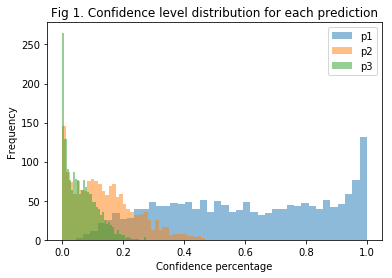

In [509]:
# defining the variables
p1 = df.p1_conf
p2 = df.p2_conf
p3 = df.p3_conf

#plotting graphs
plt.hist(p1, bins=40, alpha=.5, label='p1')
plt.hist(p2, bins=40, alpha=.5, label='p2')
plt.hist(p3, bins=40, alpha=.5, label='p3')

# labling graph 
plt.ylabel('Frequency')
plt.xlabel('Confidence percentage')
plt.title('Fig 1. Confidence level distribution for each prediction')

plt.legend(loc='best');

As seen in Fig 1. the first prediction has the highest confidence levels compared to the the second and third. However, the spread of the data is significantly higher for the first prediction. The first prediction has much higher confidence levels on average than the others.

#### Insight 2: What is the most common rated dog bread?

In [510]:
df.p1.value_counts()

golden_retriever                  135
Labrador_retriever                 91
Pembroke                           88
Chihuahua                          78
pug                                54
chow                               41
Samoyed                            40
Pomeranian                         38
toy_poodle                         37
malamute                           29
cocker_spaniel                     27
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 21
Siberian_husky                     20
German_shepherd                    20
seat_belt                          20
Staffordshire_bullterrier          19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
Cardigan                           17
beagle                             17
Shih-Tzu                           17
Italian_greyhound                  16
Rottweiler                         16
kuvasz      

In [511]:
df.p2.value_counts()

Labrador_retriever                95
golden_retriever                  80
Cardigan                          72
Chihuahua                         42
Chesapeake_Bay_retriever          40
French_bulldog                    39
Pomeranian                        38
toy_poodle                        36
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    30
Eskimo_dog                        27
beagle                            27
collie                            26
Pembroke                          24
kuvasz                            22
Italian_greyhound                 22
Pekinese                          21
American_Staffordshire_terrier    20
malinois                          20
miniature_pinscher                20
chow                              20
Norwegian_elkhound                19
toy_terrier                       19
Boston_bull                       19
Samoyed                           17
Staffordshire_bullterrier         17
p

In [512]:
df.p3.value_counts()

Labrador_retriever                75
Chihuahua                         57
golden_retriever                  44
Eskimo_dog                        36
kelpie                            33
kuvasz                            31
Staffordshire_bullterrier         30
toy_poodle                        29
cocker_spaniel                    29
chow                              29
beagle                            29
Pekinese                          28
Pomeranian                        27
Pembroke                          26
malamute                          25
French_bulldog                    25
Great_Pyrenees                    25
Chesapeake_Bay_retriever          24
Cardigan                          23
American_Staffordshire_terrier    22
basenji                           20
pug                               20
Siberian_husky                    19
bull_mastiff                      19
toy_terrier                       18
Boston_bull                       17
Lakeland_terrier                  16
S

For all three preditions the dog breed Labrador Retriever is the most frequent predictions. There are 135, 95 and 75 predictions in the first second and third predictions respectively.

#### Insight 3: What is the most common dog name and what is the average retweet and favourite count for tweets containing it?

In [513]:
df.name.value_counts()

Lucy          10
Charlie       10
Cooper        10
Oliver         9
Tucker         9
Penny          8
Sadie          7
Daisy          7
Winston        7
Toby           6
Jax            6
Koda           6
Lola           6
Oscar          5
Stanley        5
Rusty          5
Bella          5
Bo             5
Leo            5
Milo           4
George         4
Sophie         4
Dexter         4
Winnie         4
Chester        4
Cassie         4
Louis          4
Gus            4
Bear           4
Maggie         4
              ..
Holly          1
Nigel          1
Aiden          1
Sampson        1
Penelope       1
Christoper     1
Jackson        1
Zeek           1
Pluto          1
Buddah         1
Cal            1
Curtis         1
Snoop          1
Marq           1
Philippe       1
Kathmandu      1
Maude          1
Ole            1
Arnold         1
Chadrick       1
Reagan         1
Wafer          1
Jennifur       1
Gustav         1
Hazel          1
Oshie          1
Pablo          1
Dawn          

In [514]:
df[df.name=='Cooper'].mean()[3:5], \
df[df.name=='Charlie'].mean()[3:5], \
df[df.name=='Lucy'].mean()[3:5]

(retweet_count     1688.8
 favorite_count    6472.1
 dtype: float64, retweet_count     2369.111111
 favorite_count    9440.444444
 dtype: float64, retweet_count     2943.777778
 favorite_count    9073.555556
 dtype: float64)

The most common names are Cooper, Charlie and Lucy with an occurrence of 10 times. They have an average retweet count of 1689, 2369 and 2944 and an average favourite count of 6472, 9440 and 9074 respectively.

#### Insight 4: What percentage of dogs rated are good dog?

In [515]:
numerator = df[df.rating_numerator==11][df.rating_denominator==10].shape[0] +\
df[df.rating_numerator==12][df.rating_denominator==10].shape[0] 
numerator

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


774

In [516]:
denominator = df.shape[0]
denominator

1655

In [517]:
numerator/denominator

0.4676737160120846

If a good dog is defined as one with a rating of 11 or 12 out 10 then 46.4% of dogs in the dataframe are good dogs. This result is would be very underwhelming to Brent who hypothesised every dog was rated 11s and 12s. 

<a id='conclude'></a>
### Conclusion

In this project, 46.8% percent of dogs rated by WeRateDogs are found to be 'good' dogs. The most common breed of dog is the Labrador Retriever. The most common names are Cooper, Charlie and Lucy with 10 occurrences.They have an average retweet count of 1689, 2369 and 2944 and an average favourite count of 6472, 9440 and 9074 respectively. The first prediction by the neural network is the stongest with the highest mean confidence level of 0.605.